In [1]:
# importing required libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

result_df = pd.read_csv('./formula1_data/results.csv')
stats_df = pd.read_csv('./formula1_data/status.csv')
drivers_df = pd.read_csv('./formula1_data/drivers.csv')
races_df = pd.read_csv('./formula1_data/races.csv')
constructor_df = pd.read_csv('./formula1_data/constructors.csv')
laptimes_df = pd.read_csv("./formula1_data/lap_times.csv")
driver_standings_df = pd.read_csv('./formula1_data/driver_standings.csv')
qualifying_df = pd.read_csv("./formula1_data/qualifying.csv")
circuits_df = pd.read_csv("./formula1_data/circuits.csv")
pd.get_option("display.max_columns",None)

races_df.drop(["date","time","url","fp1_date","fp1_time","fp2_date","fp2_time","fp3_date","fp3_time","quali_date","quali_time","sprint_date","sprint_time"],axis=1,inplace=True)



In [2]:
result_df.head()


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [3]:
stats_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [4]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
races_df.head()

,raceId,year,round,circuitId,name
0,1,2009,1,1,Australian Grand Prix
1,2,2009,2,2,Malaysian Grand Prix
2,3,2009,3,17,Chinese Grand Prix
3,4,2009,4,3,Bahrain Grand Prix
4,5,2009,5,4,Spanish Grand Prix


In [6]:
constructor_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [7]:
driver_standings_df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [8]:
drivers_df['driverName'] = drivers_df['forename'] + ' '+drivers_df['surname']
drivers_df.drop(['forename','surname'],axis=1,inplace=True)
drivers_df

,driverId,driverRef,number,code,dob,nationality,url,driverName
0,1,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,2,heidfeld,\N,HEI,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
2,3,rosberg,6,ROS,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg
3,4,alonso,14,ALO,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
4,5,kovalainen,\N,KOV,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen
...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,Mick Schumacher
853,855,zhou,24,ZHO,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu,Guanyu Zhou
854,856,de_vries,21,DEV,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries,Nyck de Vries
855,857,piastri,81,PIA,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,Oscar Piastri


In [9]:
result_df['driver_dnf'] = result_df['statusId'].apply(lambda x: 1 if x in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137] else 0)
result_df['const_dnf'] = result_df['statusId'].apply(lambda x: 1 if x not in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137,1] else 0)


In [10]:


df1 = pd.merge(races_df,result_df,how='inner',on=['raceId'])
df2 = pd.merge(df1,qualifying_df,how='inner',on=['raceId','driverId','constructorId'])
df3 = pd.merge(df2,drivers_df,how='inner',on=['driverId'])
df4 = pd.merge(df3,constructor_df,how='inner',on=['constructorId'])
df5 = pd.merge(df4,circuits_df,how='inner',on=['circuitId'])
df5.head()

,raceId,year,round,circuitId,name_x,resultId,driverId,constructorId,number_x,grid,position_x,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driver_dnf,const_dnf,qualifyId,number_y,position_y,q1,q2,q3,driverRef,number,code,dob,nationality_x,url_x,driverName,constructorRef,name_y,nationality_y,url_y,circuitRef,name,location,country,lat,lng,alt,url
0,1,2009,1,1,Australian Grand Prix,7554,18,23,22,1,1,1,1,10.0,58,1:34:15.784,5655784,17,3,1:28.020,216.891,1,0,0,2986,22,1,1:25.211,1:24.855,1:26.202,button,22,BUT,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,Jenson Button,brawn,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,1,2009,1,1,Australian Grand Prix,7555,22,23,23,2,2,2,2,8.0,58,+0.807,5656591,43,14,1:29.066,214.344,1,0,0,2987,23,2,1:25.006,1:24.783,1:26.505,barrichello,\N,BAR,1972-05-23,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello,Rubens Barrichello,brawn,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,18,2008,1,1,Australian Grand Prix,18,18,11,16,12,\N,R,18,0.0,0,\N,\N,\N,\N,\N,\N,4,1,0,13,16,13,1:26.712,1:26.259,\N,button,22,BUT,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,Jenson Button,honda,Honda,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,36,2007,1,1,Australian Grand Prix,383,18,11,7,14,15,15,15,0.0,57,\N,\N,42,17,1:28.387,215.991,11,0,1,382,7,14,1:27.540,1:27.264,\N,button,22,BUT,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,Jenson Button,honda,Honda,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,55,2006,3,1,Australian Grand Prix,796,18,11,12,1,10,10,10,0.0,56,\N,\N,17,8,1:27.799,217.437,11,0,1,787,12,1,1:28.081,1:26.337,1:25.229,button,22,BUT,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,Jenson Button,honda,Honda,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


In [11]:
data = df5.drop(['round','circuitId','time','url_x','resultId','driverId',
                 'constructorId','number_x','positionText','position_x',
                 'positionOrder','laps','rank',
                 'fastestLapTime','fastestLapSpeed','qualifyId','driverRef','number','code','url_y','circuitRef','dob',
                 'location','lat','lng','alt','number_y','points','constructorRef','name_x','raceId','fastestLap','q2','q3','milliseconds','q1','url'],axis=1,inplace=False)
data = data[data['year'] >= 2021]
data.columns


Index(['year', 'grid', 'statusId', 'driver_dnf', 'const_dnf', 'position_y',
       'nationality_x', 'driverName', 'name_y', 'nationality_y', 'name',
       'country'],
      dtype='object')

In [12]:
data.rename(columns={'grid':'quali_pos','name_y':'constructor','position_y':'finish_pos','nationality_x':'driver_nat','nationality_y':'const_nat'},inplace=True)
data

,year,quali_pos,statusId,driver_dnf,const_dnf,finish_pos,driver_nat,driverName,constructor,const_nat,name,country
97,2022,20,1,0,0,16,Thai,Alexander Albon,Williams,British,Albert Park Grand Prix Circuit,Australia
98,2023,8,3,1,0,8,Thai,Alexander Albon,Williams,British,Albert Park Grand Prix Circuit,Australia
100,2022,18,11,0,1,19,Canadian,Nicholas Latifi,Williams,British,Albert Park Grand Prix Circuit,Australia
101,2023,18,4,1,0,18,American,Logan Sargeant,Williams,British,Albert Park Grand Prix Circuit,Australia
140,2022,7,1,0,0,7,Australian,Daniel Ricciardo,McLaren,British,Albert Park Grand Prix Circuit,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...
9800,2021,18,11,0,1,18,Italian,Antonio Giovinazzi,Alfa Romeo,Swiss,Losail International Circuit,Qatar
9801,2021,19,11,0,1,19,German,Mick Schumacher,Haas F1 Team,American,Losail International Circuit,Qatar
9802,2021,20,12,0,1,20,Russian,Nikita Mazepin,Haas F1 Team,American,Losail International Circuit,Qatar
9803,2021,2,11,0,1,4,French,Pierre Gasly,AlphaTauri,Italian,Losail International Circuit,Qatar


In [13]:
pd.unique(data['driver_nat'])

array(['Thai', 'Canadian', 'American', 'Australian', 'British', 'Spanish',
       'Monegasque', 'French', 'German', 'Mexican', 'Dutch', 'Finnish',
       'Chinese', 'Danish', 'Japanese', 'Italian', 'Russian', 'Polish'],
      dtype=object)

In [14]:
pd.unique(data['const_nat'])

array(['British', 'Italian', 'French', 'German', 'Austrian', 'Swiss',
       'American'], dtype=object)

In [15]:

pd.unique(data['country'])

array(['Australia', 'Bahrain', 'Spain', 'Monaco', 'Turkey', 'UK',
       'Hungary', 'Belgium', 'Italy', 'Singapore', 'Japan', 'Brazil',
       'UAE', 'Canada', 'Austria', 'Russia', 'Azerbaijan', 'USA',
       'Mexico', 'France', 'Portugal', 'Saudi Arabia', 'Netherlands',
       'Qatar'], dtype=object)

In [16]:


data['driver_nat'] = data['driver_nat'].apply(lambda x: str(x)[:3])
data['const_nat'] = data['const_nat'].apply(lambda x: str(x)[:3])
data['country'] = data['country'].apply(lambda x: str(x)[:3])
data['country'] = data['country'].apply(lambda x: 'Bri' if x=='UK' else x)
data['country'] = data['country'].apply(lambda x: 'Ame' if x=='USA' else x)
data['country'] = data['country'].apply(lambda x: 'Fre' if x=='Fra' else x)
data['driver_home'] = data['driver_nat'] == data['country']
data['const_home'] = data['const_nat'] == data['country']
data['driver_home'] = data['driver_home'].apply(lambda x: int(x))
data['const_home'] = data['const_home'].apply(lambda x: int(x))
data.head()



,year,quali_pos,statusId,driver_dnf,const_dnf,finish_pos,driver_nat,driverName,constructor,const_nat,name,country,driver_home,const_home
97,2022,20,1,0,0,16,Tha,Alexander Albon,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0
98,2023,8,3,1,0,8,Tha,Alexander Albon,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0
100,2022,18,11,0,1,19,Can,Nicholas Latifi,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0
101,2023,18,4,1,0,18,Ame,Logan Sargeant,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0
140,2022,7,1,0,0,7,Aus,Daniel Ricciardo,McLaren,Bri,Albert Park Grand Prix Circuit,Aus,1,0


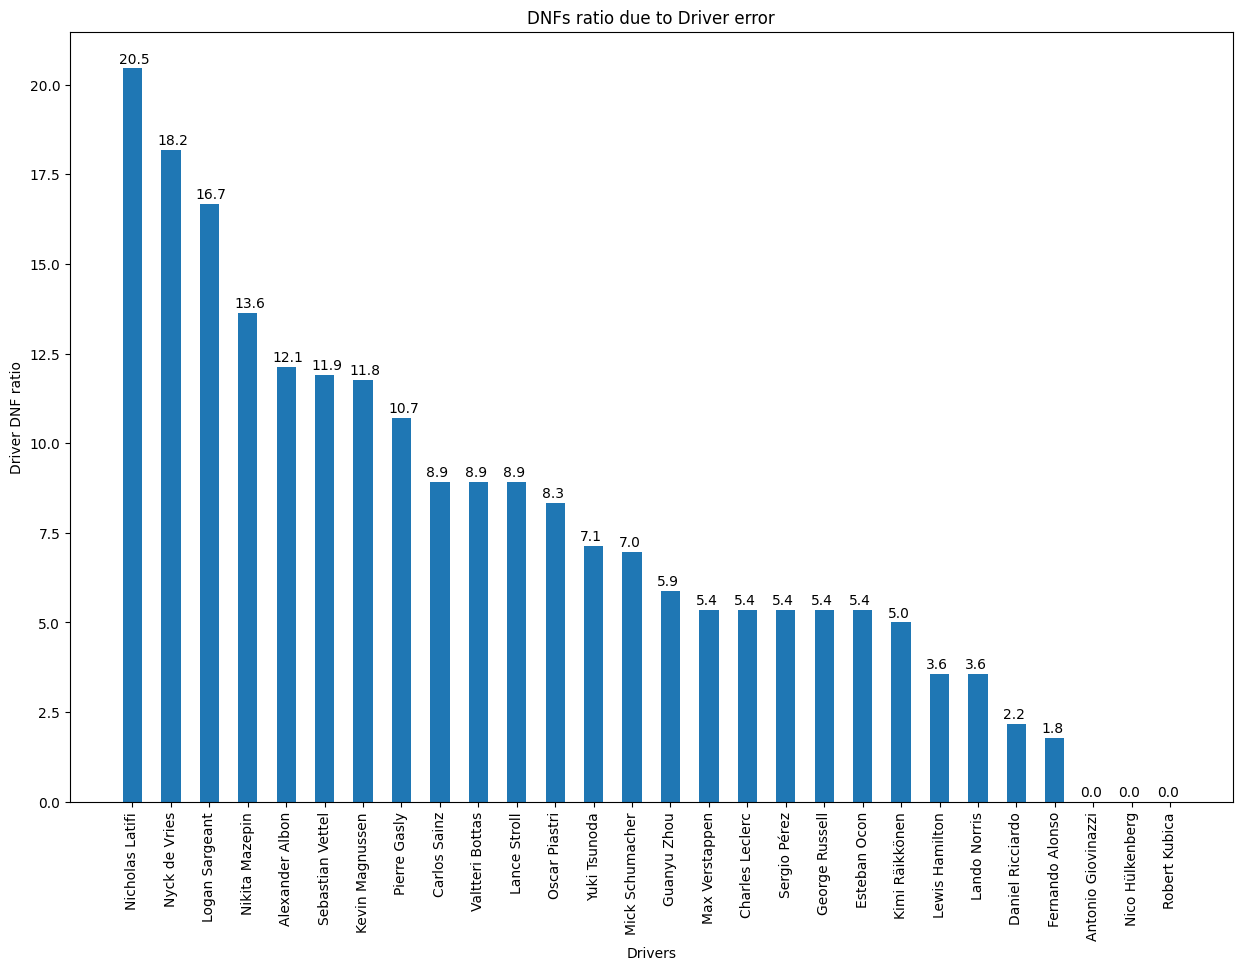

In [17]:
dnf_by_driver= data.groupby('driverName').sum()['driver_dnf']
drivers_race_entered = data.groupby('driverName').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver*100/drivers_race_entered).sort_values(ascending=False)
plt.figure(figsize=(15,10))
bars = plt.bar(x=driver_dnf_ratio.index,height=driver_dnf_ratio,align='center',width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Drivers')
plt.ylabel('Driver DNF ratio')
plt.title('DNFs ratio due to Driver error')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()-0.1,yval+0.15,f'{round(yval,1)}')
plt.show()

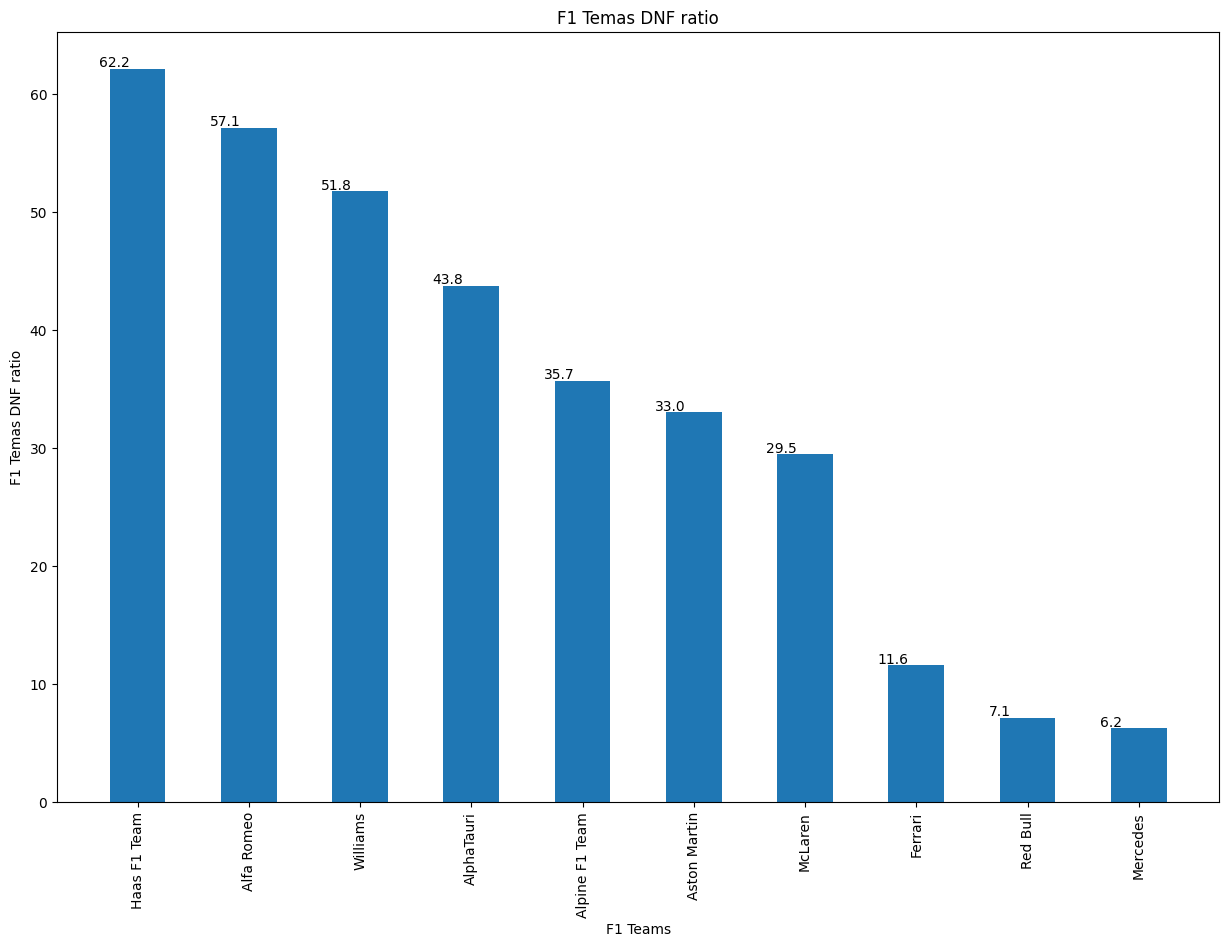

In [20]:
dnf_by_constructor = data.groupby('constructor').sum()['const_dnf']
constructor_race_entered = data.groupby('constructor').count()['const_dnf']
constructor_dnf_ratio = (dnf_by_constructor*100/constructor_race_entered).sort_values(ascending=False)
plt.figure(figsize=(15,10))
bars = plt.bar(x=constructor_dnf_ratio.index,height=constructor_dnf_ratio,align='center',width=0.5)
plt.xticks(rotation=90)
plt.xlabel('F1 Teams')
plt.ylabel('F1 Temas DNF ratio')
plt.title('F1 Temas DNF ratio')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()-0.1,yval+0.15,f'{round(yval,1)}')
plt.show()